In [1]:
# Importing all the needed libaries 

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator 
from qiskit.quantum_info import random_unitary
from qiskit.result import marginal_counts




import matplotlib.pyplot as plt
%matplotlib inline


In [2]:

U = random_unitary(2)
U_gate = U.to_instruction()
U_dagger_gate = U.adjoint().to_instruction()

In [3]:
data_q = QuantumRegister(1, "data_qubit")
alice_q = QuantumRegister(1, "alice_qubit")
bob_q = QuantumRegister(1, "bob_qubit")
alice_c1 = ClassicalRegister(1, "alice_measurement1")
alice_c2 = ClassicalRegister(1, "alice_measurement2")
bob_c = ClassicalRegister(1, "bob_measurement")

In [4]:
qc = QuantumCircuit(data_q, alice_q, bob_q, alice_c1, alice_c2, bob_c)

qc.h(alice_q[0])
qc.cx(alice_q[0], bob_q[0])
qc.barrier()  
qc.append(U_gate, [data_q[0]])
qc.barrier()  
qc.cx(data_q[0], alice_q[0])
qc.h(data_q[0])
qc.measure(data_q[0], alice_c1[0])
qc.measure(alice_q[0], alice_c2[0])
qc.barrier()
qc.x(bob_q[0]).c_if(alice_c2, 1)
qc.z(bob_q[0]).c_if(alice_c1, 1)
qc.barrier()
qc.append(U_dagger_gate, [bob_q[0]])
qc.measure(bob_q[0], bob_c[0])

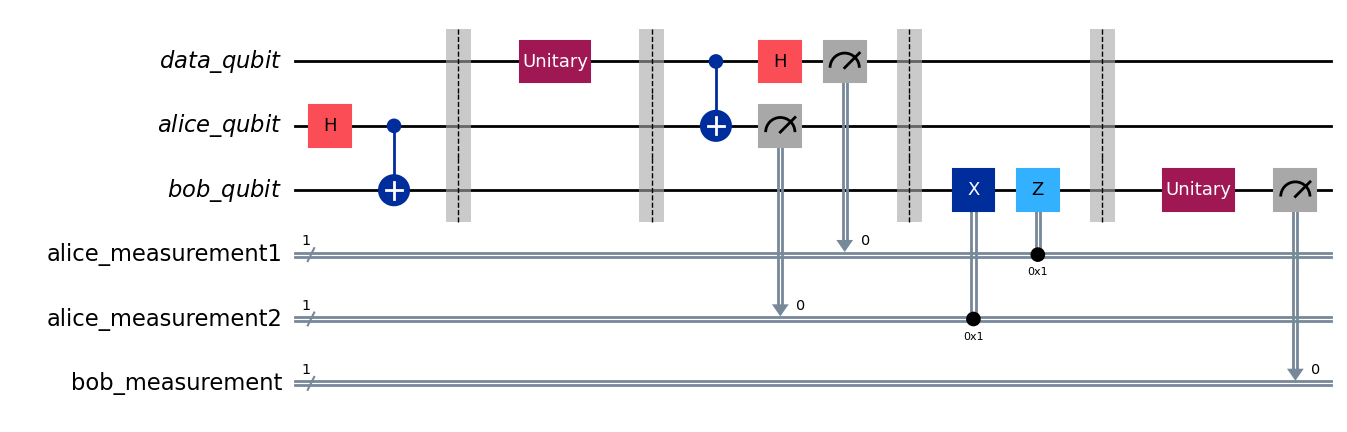

In [5]:
qc.draw("mpl")

{'0': 1024}


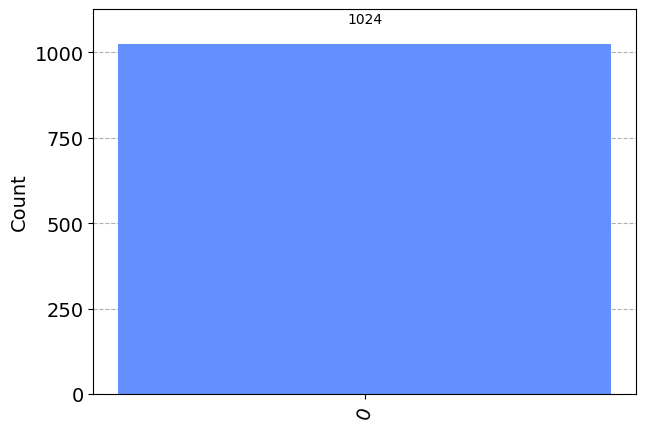

In [6]:
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
counts = result.get_counts()

marginal_result = marginal_counts(result.get_counts(), indices=[2])
print(marginal_result)
plot_histogram(marginal_result)

In [12]:
service = QiskitRuntimeService()

backend = service.least_busy(operational=True, simulator=False)

transpiled_qc = transpile(qc, backend)

sampler = Sampler(backend)
job = sampler.run([transpiled_qc])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)


job id: ct6krqtcvhg0008wcja0


RuntimeJobFailureError: 'Unable to retrieve job result. Instruction bfunc is not supported'